In [1]:
import os
import sys

if 'google.colab' in sys.modules and not os.path.exists('.setup_complete'):
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/master/setup_colab.sh -O- | bash
    !touch .setup_complete

# This code creates a virtual display to draw game images on.
# It will have no effect if your machine has a monitor.
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    os.environ['DISPLAY'] = ':1'

In [2]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

In [3]:
env = gym.make("FrozenLake-v1", is_slippery=True, render_mode="rgb_array")

state_size = env.observation_space.n
action_size = env.action_space.n

In [4]:
def q_table_init(state_size, action_size):
    return np.zeros((state_size, action_size))

In [5]:
def choose_action(q_table, state, epsilon):
    if random.uniform(0, 1) > epsilon:
        return np.argmax(q_table[state])
    return env.action_space.sample()

In [6]:
def get_new_q_value(q_table, state, action, reward, next_state, gamma):
    return q_table[state, action] + alpha * (
            reward + gamma * np.max(q_table[next_state]) - q_table[state, action])

In [7]:
def get_new_epsilon(epsilon, min_epsilon):
    return max(min_epsilon, epsilon * epsilon_decay)

In [8]:
Q_table = np.zeros((state_size, action_size))

# Гиперпараметры
alpha = 0.1  # Коэффициент обучения
gamma = 0.99  # Коэффициент дисконтирования
epsilon = 1.0  # Начальное значение epsilon (для e-greedy стратегии)
epsilon_decay = 0.995  # Скорость уменьшения epsilon
min_epsilon = 0.01  # Минимальное значение epsilon

episodes = 2000  # Количество эпизодов
max_steps = 100  # Максимальное количество шагов в эпизоде

# Список для хранения вознаграждений
rewards = []

Эпизод: 200, средняя награда: 0.015, epsilon: 0.367
Эпизод: 400, средняя награда: 0.1, epsilon: 0.135
Эпизод: 600, средняя награда: 0.125, epsilon: 0.049
Эпизод: 800, средняя награда: 0.105, epsilon: 0.018
Эпизод: 1000, средняя награда: 0.19, epsilon: 0.010
Эпизод: 1200, средняя награда: 0.215, epsilon: 0.010
Эпизод: 1400, средняя награда: 0.18, epsilon: 0.010
Эпизод: 1600, средняя награда: 0.29, epsilon: 0.010
Эпизод: 1800, средняя награда: 0.285, epsilon: 0.010
Эпизод: 2000, средняя награда: 0.29, epsilon: 0.010


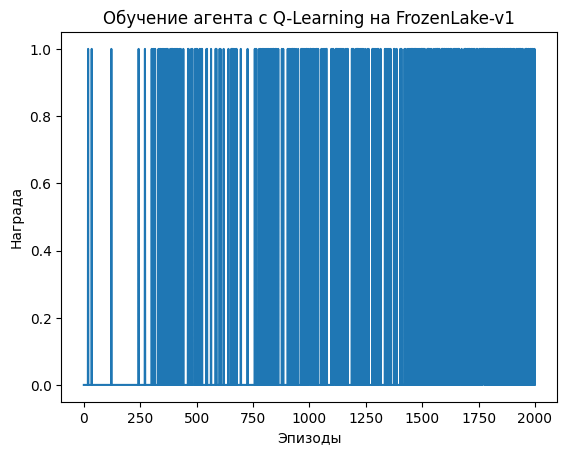

In [9]:
for episode in range(episodes):
    state = env.reset()[0]
    total_reward = 0
    for step in range(max_steps):
        # Выбор действия с учетом epsilon-жадной стратегии
        action = choose_action(Q_table, state, epsilon)

        # Выполняем действие
        next_state, reward, done, _, _ = env.step(action)

        # Обновляем Q-значение по уравнению Беллмана
        Q_table[state, action] = get_new_q_value(Q_table, state, action, reward, next_state, gamma)

        total_reward += reward
        state = next_state

        if done:
            break

    # Уменьшаем epsilon
    epsilon = get_new_epsilon(epsilon, min_epsilon)
    rewards.append(total_reward)

    if (episode + 1) % 200 == 0:
        print(f"Эпизод: {episode + 1}, средняя награда: {np.mean(rewards[-200:])}, epsilon: {epsilon:.3f}")

# График зависимости награды от эпизодов
plt.plot(range(episodes), rewards)
plt.xlabel("Эпизоды")
plt.ylabel("Награда")
plt.title("Обучение агента с Q-Learning на FrozenLake-v1")
plt.show()

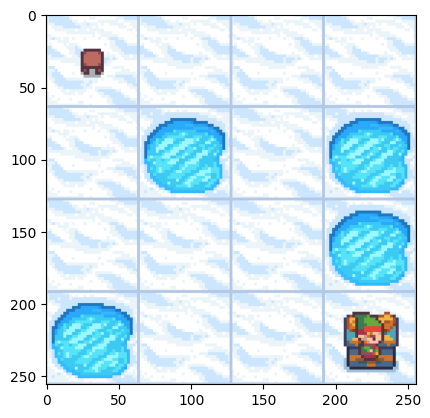

In [10]:
display.clear_output(wait=True)
state = env.reset()[0]
done = False
total_reward = 0
print(f"Эпизод {episode + 1}:")
while not done:
    action = choose_action(Q_table, state, epsilon)
    state, reward, done, _, _ = env.step(action)
    total_reward += reward
    plt.imshow(env.render())

    display.display(plt.gcf())
    display.clear_output(wait=True)